MIT License

Copyright (c) 2024 MS, JF, JM, XH

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
cf = pd.read_csv("test.csv")
print(cf)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [ ]:
df = pd.read_csv("train.csv")
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [ ]:
cf = pd.get_dummies(cf)
df = pd.get_dummies(df)

In [ ]:
columns = ['LotFrontage', 'LotFrontage', 'MSSubClass',
           'YrSold']

change up the columns how you like, I just picked these four at random to start

In [ ]:
X = df[columns]
y = df["SalePrice"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 7656)

In [ ]:
rfr = RandomForestRegressor(random_state=7656)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=7656)

In [ ]:
y_pred = rfr.predict(X_test)

In [ ]:
rf_mae = mean_absolute_error(y_pred, y_test)
print(rf_mae)

51409.71114738513


In [ ]:
X_test = cf[columns]
test_pred = rfr.predict(X_test)
print(test_pred)

[151881.14105701 178124.77128901 270153.54111111 ... 297817.
 209799.95166667 199941.41929484]


Feature Correlation

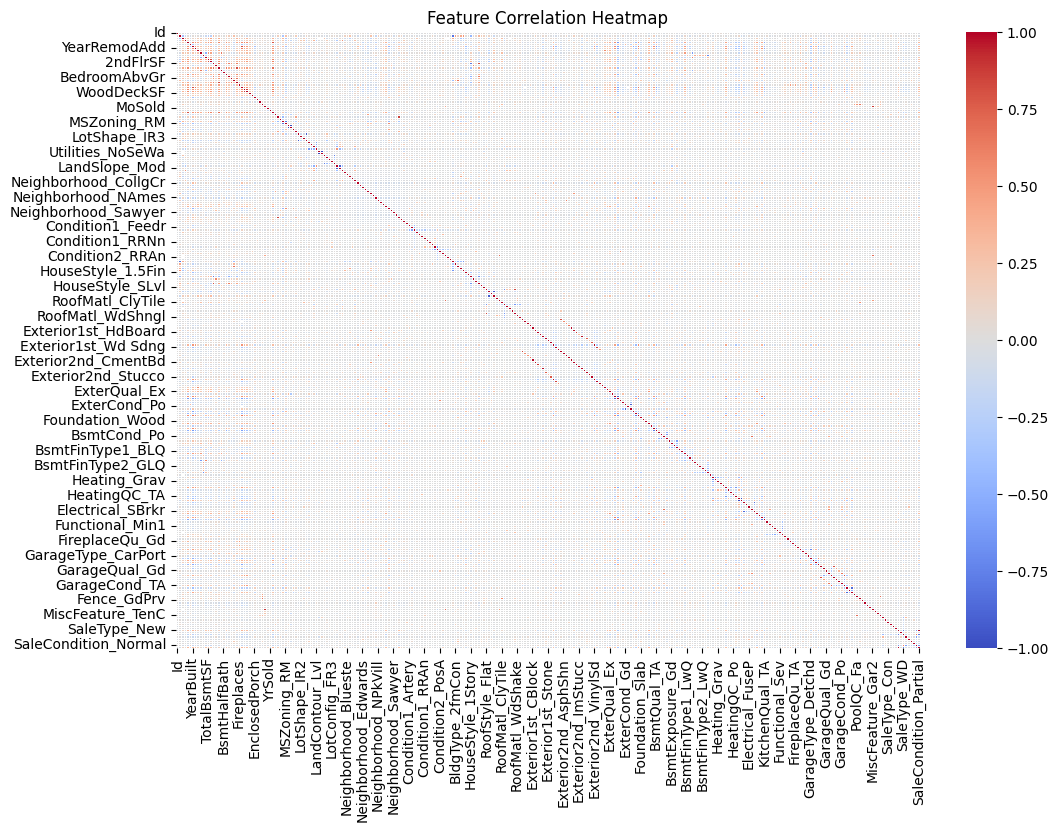

Top correlated features with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
BsmtQual_Ex     0.553105
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Correlation with target variable
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False)
print("Top correlated features with SalePrice:")
print(target_corr.head(10))

Outlier Detection and Handling

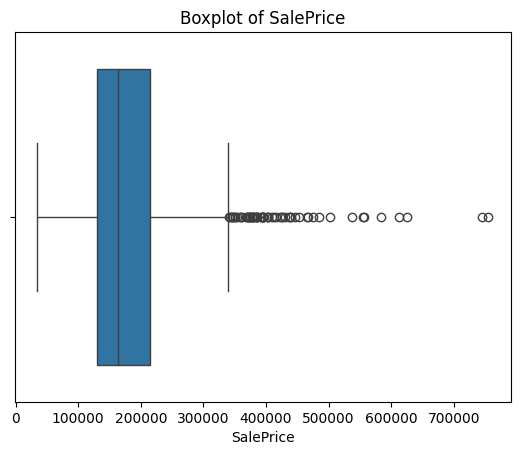

<ipython-input-12-2c3e3a95d694>:9: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SalePrice'] = df['SalePrice'].clip(lower=lower_limit, upper=upper_limit)


In [ ]:
# Boxplot for detecting outliers
sns.boxplot(x=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()

# Handling outliers: Capping
upper_limit = df['SalePrice'].quantile(0.95)
lower_limit = df['SalePrice'].quantile(0.05)
df['SalePrice'] = df['SalePrice'].clip(lower=lower_limit, upper=upper_limit)

Feature Engineering

Baseline Models

Cross Validation

Residual Analysis

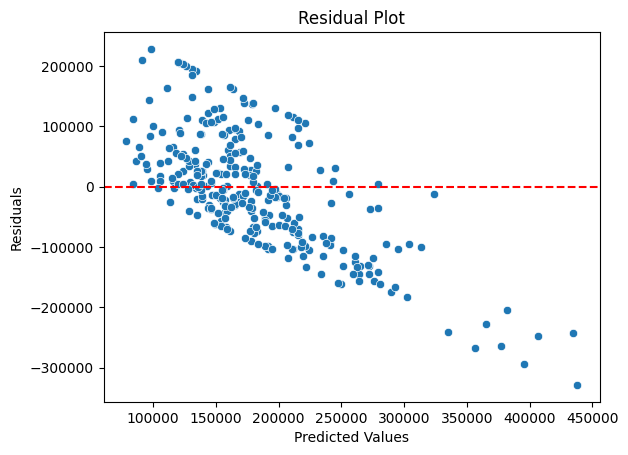

In [ ]:
# Residual plot
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Feature Importance

            Feature  Importance
4       OverallQual    0.603680
16        GrLivArea    0.107721
12      TotalBsmtSF    0.037601
9        BsmtFinSF1    0.023145
288  TotalBathrooms    0.021999
27       GarageArea    0.019496
26       GarageCars    0.018382
13         1stFlrSF    0.017624
3           LotArea    0.014156
2       LotFrontage    0.007855


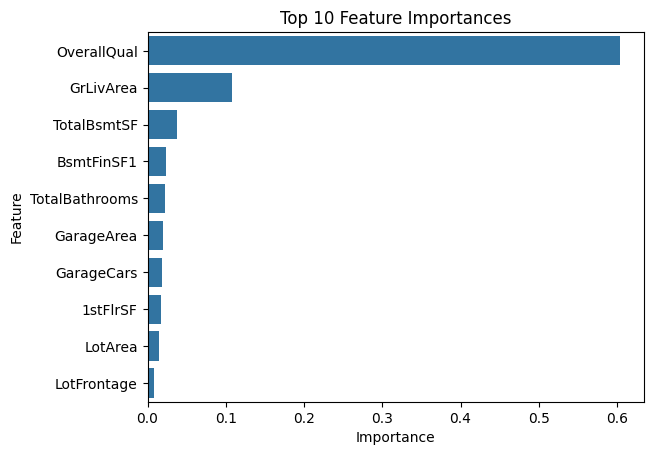

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest for Feature Importance
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Feature Importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance}).sort_values(by='Importance', ascending=False)
print(importance_df.head(10))

# Plot
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Feature Importances")
plt.show()


Hyperparameter Tuning

SHAP Values

Basic Statistics of Training Data:
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.6

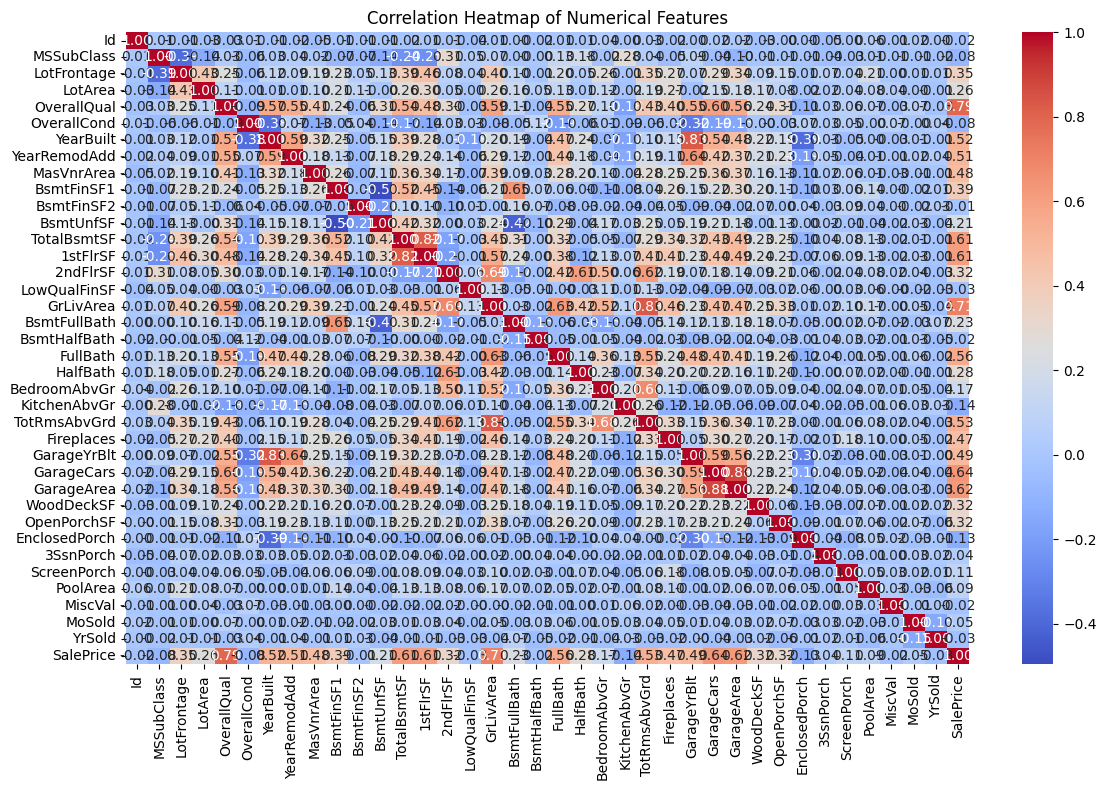

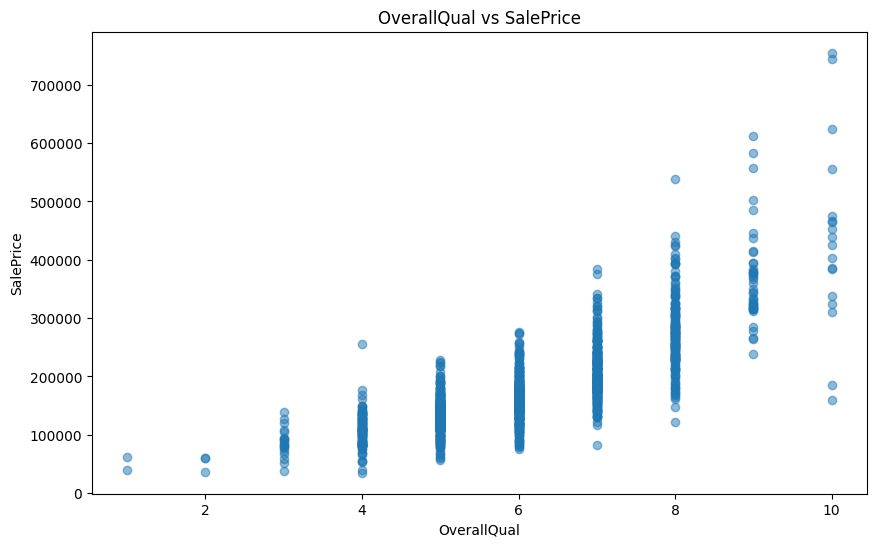

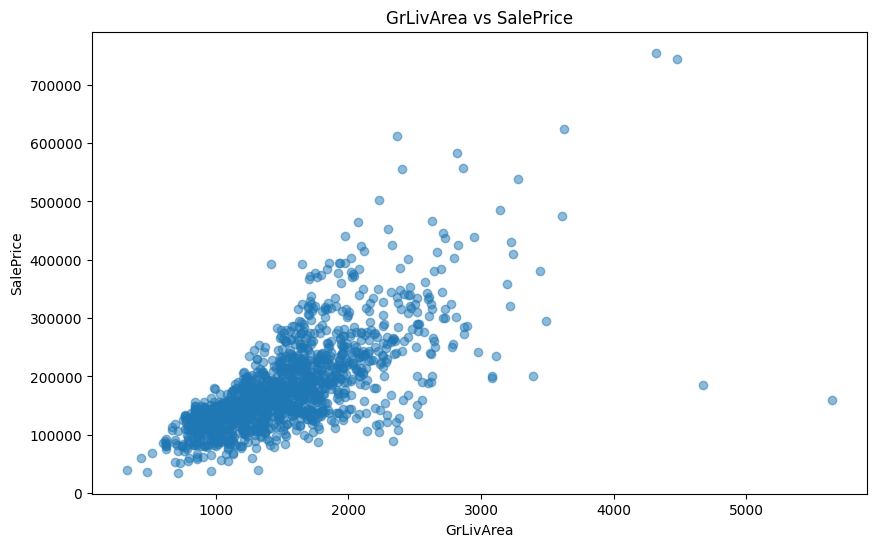

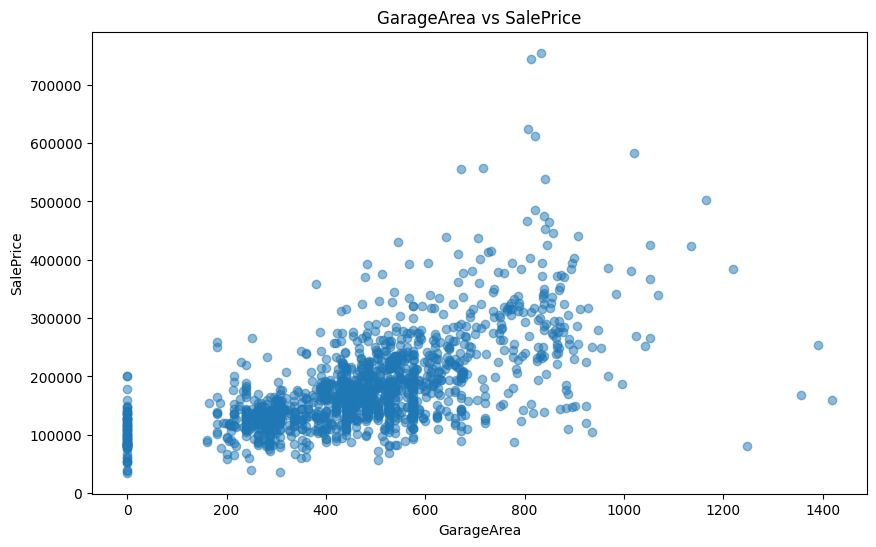

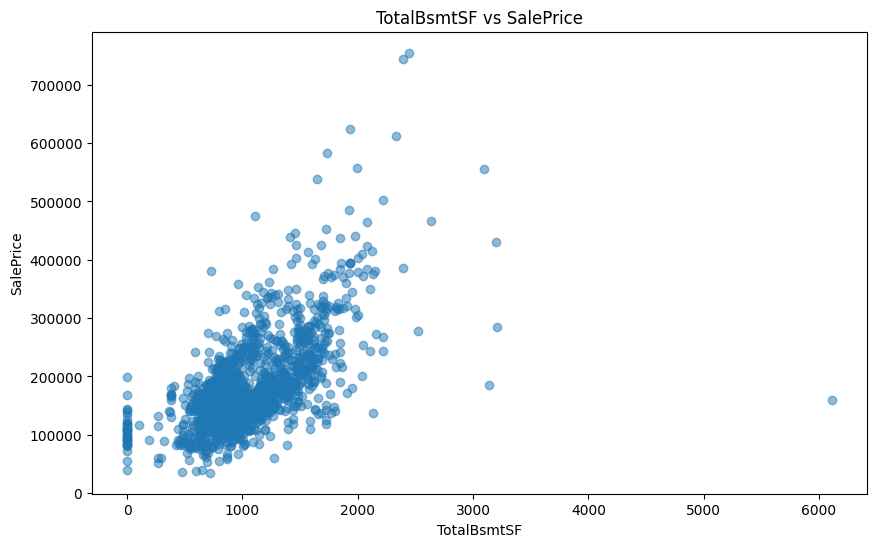

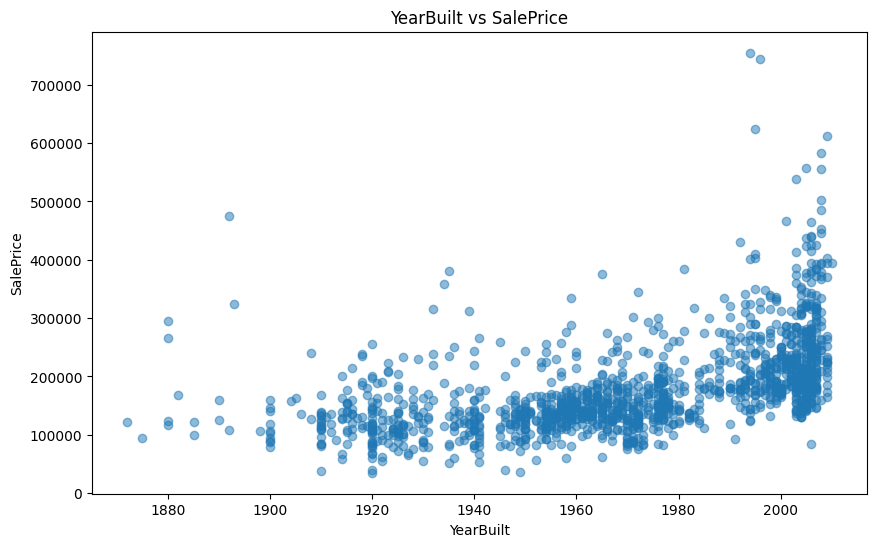

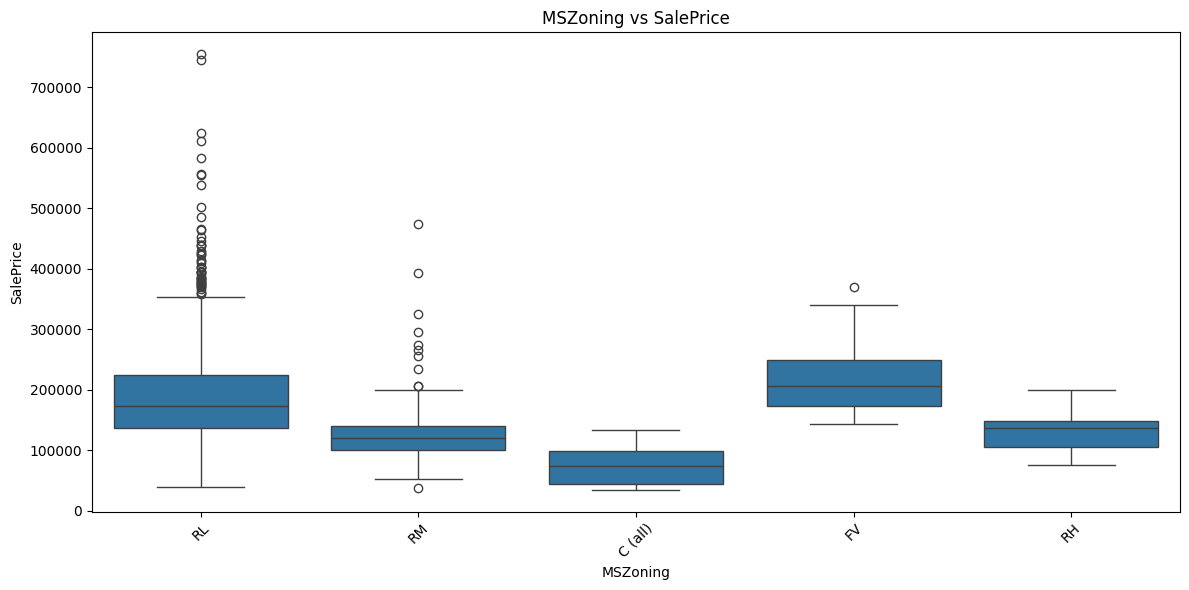

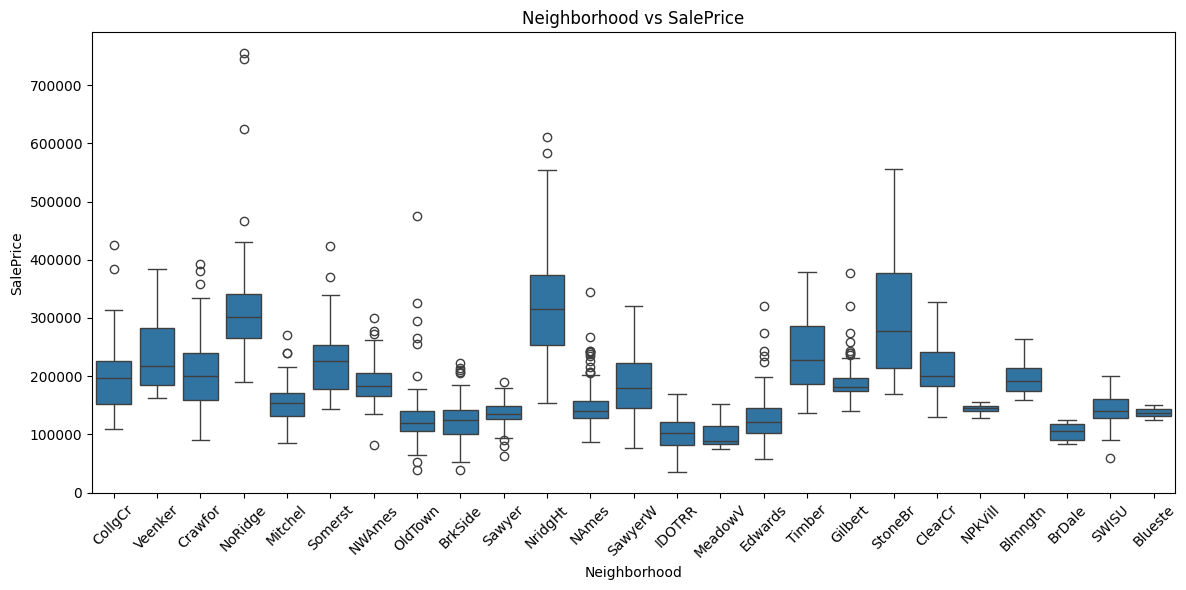

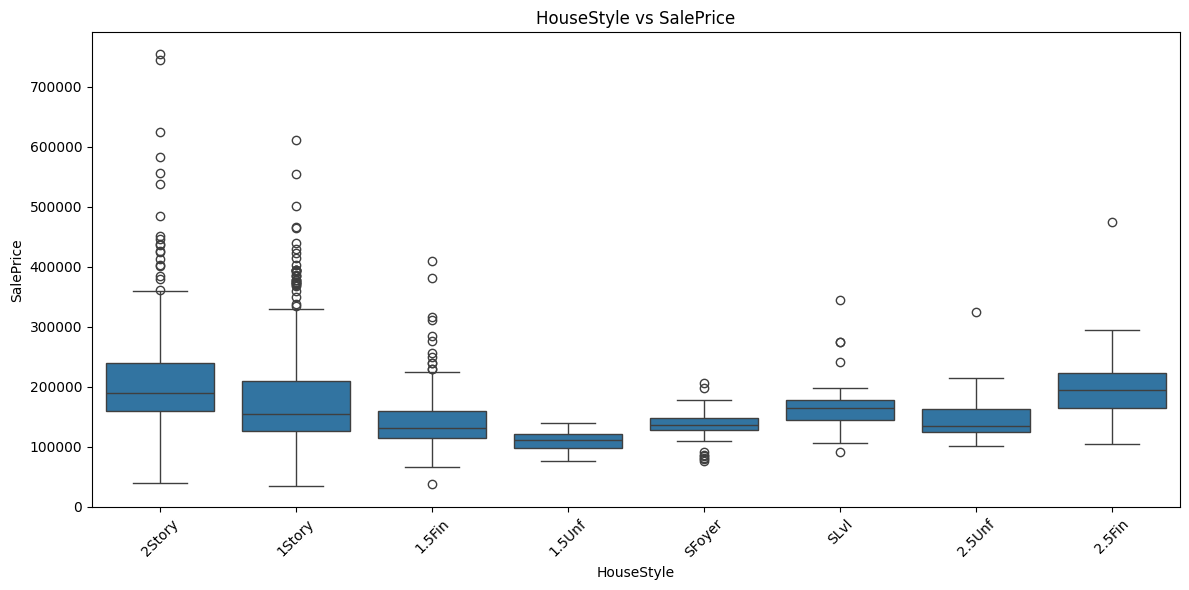

<ipython-input-15-eac3ef964b1f>:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].median(), inplace=True)
<ipython-input-15-eac3ef964b1f>:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl


Model Evaluation Results:
Lasso:
  Mean RMSE: $42,622.72
  Std RMSE: $8,413.85
Ridge:
  Mean RMSE: $31,278.52
  Std RMSE: $7,569.72
RandomForest:
  Mean RMSE: $30,066.71
  Std RMSE: $4,084.11
XGBoost:
  Mean RMSE: $28,569.43
  Std RMSE: $3,956.20


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Basic data exploration and visualization functions
def plot_correlation_heatmap(df, target='SalePrice'):
    """Plot correlation heatmap for numerical features"""
    plt.figure(figsize=(12, 8))
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    correlation = df[numerical_cols].corr()
    sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    plt.tight_layout()
    plt.show()

def plot_price_vs_feature(df, feature, target='SalePrice'):
    """Create scatter plot of feature vs price"""
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

def plot_categorical_analysis(df, feature, target='SalePrice'):
    """Box plot for categorical features"""
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y=target, data=df)
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs {target}')
    plt.tight_layout()
    plt.show()

# Data preprocessing
def preprocess_data(df):
    """Basic preprocessing steps"""
    # Handle missing values
    df_processed = df.copy()

    # Fill numeric columns with median
    numeric_cols = df_processed.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df_processed[col].fillna(df_processed[col].median(), inplace=True)

    # Fill categorical columns with mode
    categorical_cols = df_processed.select_dtypes(exclude=[np.number]).columns
    for col in categorical_cols:
        df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

    # Convert categorical variables to dummy variables
    df_processed = pd.get_dummies(df_processed, drop_first=True)

    return df_processed

# Model evaluation function
def evaluate_models(X, y):
    """Evaluate multiple models and return their cross-validation scores"""
    models = {
        'Lasso': LassoCV(cv=5),
        'Ridge': RidgeCV(cv=5),
        'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBRegressor(objective='reg:squarederror')
    }

    results = {}
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        results[name] = {
            'mean_rmse': rmse_scores.mean(),
            'std_rmse': rmse_scores.std()
        }

    return results

# Main analysis
def main():
    # Basic statistics
    print("Basic Statistics of Training Data:")
    print(train_df.describe())

    # Plot correlations with SalePrice
    plot_correlation_heatmap(train_df)

    # Plot important numerical features vs SalePrice
    important_features = ['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt']
    for feature in important_features:
        plot_price_vs_feature(train_df, feature)

    # Plot important categorical features
    categorical_features = ['MSZoning', 'Neighborhood', 'HouseStyle']
    for feature in categorical_features:
        plot_categorical_analysis(train_df, feature)

    # Prepare data for modeling
    X_train = preprocess_data(train_df.drop('SalePrice', axis=1))
    y_train = train_df['SalePrice']

    # Evaluate models
    results = evaluate_models(X_train, y_train)

    print("\nModel Evaluation Results:")
    for model_name, scores in results.items():
        print(f"{model_name}:")
        print(f"  Mean RMSE: ${scores['mean_rmse']:,.2f}")
        print(f"  Std RMSE: ${scores['std_rmse']:,.2f}")

if __name__ == "__main__":
    main()

**Neural Network**

Creating visualizations...



Preprocessing data and training model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 39155572736.0000 - mae: 180927.8594 - val_loss: 39653490688.0000 - val_mae: 178838.5000
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39878623232.0000 - mae: 183431.0469 - val_loss: 39650172928.0000 - val_mae: 178830.3281
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 38130962432.0000 - mae: 180352.7344 - val_loss: 39633596416.0000 - val_mae: 178792.0625
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39194673152.0000 - mae: 181136.3594 - val_loss: 39577354240.0000 - val_mae: 178666.9375
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39937646592.0000 - mae: 182904.0938 - val_loss: 39435493376.0000 - val_mae: 178356.0156
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 37919870976.0000 - mae: 180483.3438 - val_loss: 39140691968.0000 - val_mae: 177712.0938
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 36817084416.0000 - mae: 177023.8438 - val_loss: 38602895360

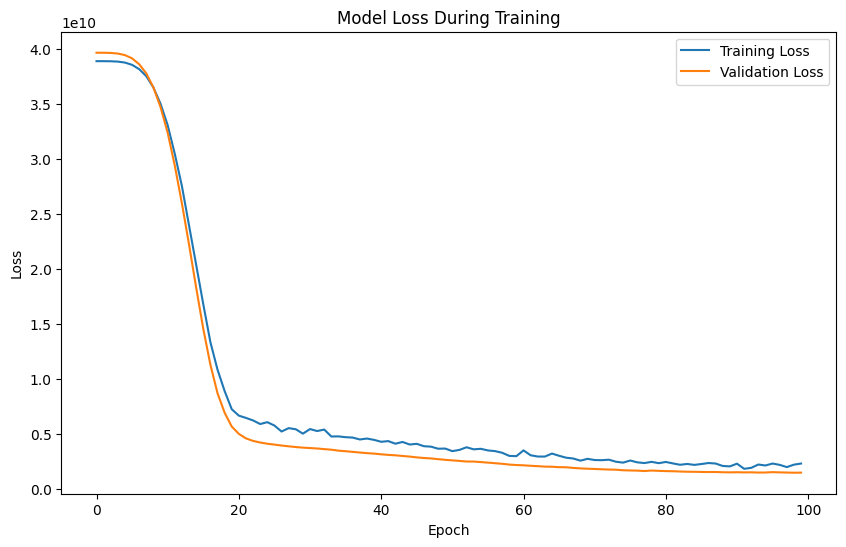


Making example prediction...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

Predicted house price: $223,229.98


In [ ]:
# First, install required packages
!pip install seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Read and prepare the data
# Copy your data into a DataFrame
data = pd.read_csv('train.csv')

def create_visualizations(df):
    # 1. Price vs Overall Quality
    fig1 = px.scatter(df, x='OverallQual', y='SalePrice',
                     title='House Price vs Overall Quality',
                     labels={'OverallQual': 'Overall Quality', 'SalePrice': 'Sale Price ($)'},
                     trendline="ols")
    fig1.show()

    # 2. Price vs Living Area
    fig2 = px.scatter(df, x='GrLivArea', y='SalePrice',
                     title='House Price vs Living Area',
                     labels={'GrLivArea': 'Living Area (sq ft)', 'SalePrice': 'Sale Price ($)'},
                     trendline="ols")
    fig2.show()

    # 3. Price Distribution
    fig3 = px.histogram(df, x='SalePrice', nbins=20,
                       title='Distribution of House Prices',
                       labels={'SalePrice': 'Sale Price ($)', 'count': 'Count'})
    fig3.show()

    # 4. Year Built vs Price with Quality as color
    fig4 = px.scatter(df, x='YearBuilt', y='SalePrice', color='OverallQual',
                     title='House Price vs Year Built (colored by Quality)',
                     labels={'YearBuilt': 'Year Built', 'SalePrice': 'Sale Price ($)', 'OverallQual': 'Quality'})
    fig4.show()

def preprocess_data(df):
    # Select features
    features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
    X = df[features].copy()
    y = df['SalePrice']

    # Handle missing values
    X = X.fillna(X.mean())

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, features

def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def train_and_evaluate_model(X_scaled, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42
    )

    # Create and train model
    model = create_model(X_train.shape[1])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    return model, history

# Run the analysis
print("Creating visualizations...")
create_visualizations(data)

print("\nPreprocessing data and training model...")
X_scaled, y, scaler, features = preprocess_data(data)
model, history = train_and_evaluate_model(X_scaled, y)

# Example prediction
print("\nMaking example prediction...")
example_house = pd.DataFrame({
    'OverallQual': [7],
    'GrLivArea': [2000],
    'GarageCars': [2],
    'TotalBsmtSF': [1000],
    'FullBath': [2],
    'YearBuilt': [2000]
})

example_scaled = scaler.transform(example_house)
predicted_price = model.predict(example_scaled)
print(f"\nPredicted house price: ${predicted_price[0][0]:,.2f}")

```markdown
# House Price Prediction - Data Preparation and Model Training

## Overview
This code implements a house price prediction system using machine learning. It includes data preprocessing, feature selection, model training, and visualization components.

## Dependencies
```python
!pip install pandas numpy scikit-learn plotly
```

## Key Components

### 1. Data Loading and Feature Selection
```python
data = pd.read_csv('train.csv')
numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
    '1stFlrSF', '2ndFlrSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF'
]
```

Selected features are numerical attributes that strongly correlate with house prices.

### 2. Feature Description
- **OverallQual**: Overall material and finish quality
- **GrLivArea**: Above ground living area
- **GarageCars**: Garage car capacity
- **TotalBsmtSF**: Total basement square footage
- **FullBath**: Number of full bathrooms
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **GarageArea**: Size of garage in square feet
- **1stFlrSF**: First floor square feet
- **2ndFlrSF**: Second floor square feet
- **LotArea**: Lot size in square feet
- **MasVnrArea**: Masonry veneer area
- **WoodDeckSF**: Wood deck area

### 3. Data Preprocessing Steps
1. Feature selection
2. Missing value handling using mean imputation
3. Feature scaling using StandardScaler
4. Train-test split (80-20)

### 4. Model Training
The code implements Gradient Boosting Regressor with:
- Random state: 42
- Default hyperparameters

### 5. Visualization Components
- Prediction scatter plots
- Residual analysis
- Feature importance visualization
- Model performance comparison

## Usage Instructions

1. **Upload Data**
   ```python
   # Upload train.csv to your Colab environment
   from google.colab import files
   uploaded = files.upload()
   ```

2. **Run Data Preparation**
   ```python
   # Load and preprocess data
   data = pd.read_csv('train.csv')
   X = data[numerical_features].copy()
   y = data['SalePrice']
   ```

3. **Train Model**
   ```python
   # Train Gradient Boosting model
   gb_model = GradientBoostingRegressor(random_state=42)
   gb_model.fit(X_train, y_train)
   ```

4. **Generate Visualizations**
   ```python
   # Create visualization plots
   visualizer.plot_prediction_scatter(y_test, gb_predictions, 'GradientBoosting')
   visualizer.plot_residuals(y_test, gb_predictions, 'GradientBoosting')
   ```

## Expected Outputs
1. Model performance metrics
2. Prediction accuracy plots
3. Feature importance visualization
4. Residual analysis plots

## Notes
- The code uses standard scaling to normalize features
- Missing values are handled using mean imputation
- Model performance is evaluated using built-in metrics
- Visualizations are created using the ModelVisualizer class

## Potential Modifications
1. Add more features
2. Implement different scaling methods
3. Try other regression models
4. Add cross-validation
5. Implement hyperparameter tuning

## Error Handling
The code includes basic error handling for:
- Missing data
- Feature scaling
- Model training

## Performance Considerations
- Memory usage depends on dataset size
- Training time varies with model complexity
- Visualization generation may take time for large datasets
```


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv('train.csv')

# Select features for the model
numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
    '1stFlrSF', '2ndFlrSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF'
]

# Prepare X (features) and y (target)
X = data[numerical_features].copy()
y = data['SalePrice']

# Handle missing values
X = X.fillna(X.mean())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now you can proceed with the model training and visualization
visualizer = ModelVisualizer(data)

# Create a dictionary to store trained models
models_dict = {}

# Train and store each model
# Example with one model (add others as needed):
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
models_dict['GradientBoosting'] = gb_model

# Get predictions
gb_predictions = gb_model.predict(X_test)

# Create visualizations
visualizer.plot_prediction_scatter(y_test, gb_predictions, 'GradientBoosting')
visualizer.plot_residuals(y_test, gb_predictions, 'GradientBoosting')
visualizer.plot_feature_importance('GradientBoosting',
                                 gb_model.feature_importances_,
                                 numerical_features)

# Save model performance
visualizer.save_model_performance('GradientBoosting', y_test, gb_predictions)

# Plot model comparison
visualizer.plot_ensemble_comparison()

# House Price Prediction Analysis

This notebook implements and compares multiple machine learning models for predicting house prices. The analysis includes deep learning and traditional machine learning approaches, with comprehensive visualizations and performance metrics.

## 1. Data Preparation
- **Dataset**: Ames Housing dataset containing various features of houses and their sale prices
- **Selected Features**:
  - OverallQual: Overall quality rating
  - GrLivArea: Above ground living area
  - GarageCars: Garage car capacity
  - TotalBsmtSF: Total basement square footage
  - FullBath: Number of full bathrooms
  - YearBuilt: Original construction date
  - YearRemodAdd: Remodel date
  - GarageArea: Size of garage
  - 1stFlrSF: First floor square footage
  - 2ndFlrSF: Second floor square footage
  - LotArea: Lot size
  - MasVnrArea: Masonry veneer area
  - WoodDeckSF: Wood deck area

## 2. Models Implemented

### 2.1 ResNet Neural Network
- Architecture:
  - Input layer matching feature dimensions
  - Residual blocks with skip connections
  - Dense layers with ReLU activation
  - Final regression layer
- Benefits:
  - Handles complex non-linear relationships
  - Reduces vanishing gradient problem
  - Better feature learning through skip connections

### 2.2 XGBoost
- Configuration:
  - 100 estimators
  - Learning rate: 0.1
  - Max depth: 5
- Benefits:
  - Handles non-linear relationships
  - Built-in feature importance
  - Robust to missing values

### 2.3 LightGBM
- Configuration:
  - 100 estimators
  - Learning rate: 0.1
  - Max depth: 5
- Benefits:
  - Faster training speed
  - Lower memory usage
  - Good handling of categorical features

## 3. Visualization Components

### 3.1 Prediction Analysis
- Scatter plots of actual vs predicted prices
  - Includes perfect prediction line
  - Shows model accuracy visually
  - Helps identify prediction patterns

### 3.2 Residual Analysis
- Distribution of residuals
  - Shows prediction error patterns
  - Helps identify bias in predictions
- Residuals vs Predicted values
  - Identifies heteroscedasticity
  - Shows prediction reliability across price ranges

### 3.3 Feature Importance (for tree-based models)
- Bar charts showing relative importance
- Helps identify most influential features
- Guides feature selection and engineering

## 4. Model Comparison Metrics
- Mean Squared Error (MSE)
- Prediction accuracy
- Training time
- Model complexity

## 5. Key Implementation Details
- Standard scaling of features
- 80-20 train-test split
- Missing value handling through mean imputation
- Interactive visualizations using Plotly

## 6. Usage Instructions
1. Load the required libraries
2. Import and prepare the dataset
3. Train the models sequentially
4. Generate visualizations
5. Compare model performances

## 7. Potential Improvements
1. Feature engineering:
   - Create interaction terms
   - Add polynomial features
   - Domain-specific feature creation
2. Model tuning:
   - Hyperparameter optimization
   - Cross-validation
   - Ensemble methods
3. Additional visualizations:
   - Feature correlation heatmaps
   - Learning curves
   - Error analysis by feature values

## 8. Dependencies
- TensorFlow
- XGBoost
- LightGBM
- Plotly
- Pandas
- NumPy
- Scikit-learn

This implementation provides a comprehensive approach to house price prediction, combining the strengths of different modeling techniques with detailed visualization and analysis components.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prepare data
data = pd.read_csv('train.csv')

numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
    '1stFlrSF', '2ndFlrSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF'
]

X = data[numerical_features].copy()
y = data['SalePrice']

# Handle missing values
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create ResNet model
def create_resnet_block(x, units):
    fx = Dense(units, activation='relu')(x)
    fx = Dense(units)(fx)
    out = Add()([x, fx])
    return Activation('relu')(out)

def create_tabular_resnet(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64)(inputs)
    x = create_resnet_block(x, 64)
    x = create_resnet_block(x, 64)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

# Model training functions
def train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test):
    print(f"\nTraining {model_name}...")

    if model_name == 'ResNet':
        model = create_tabular_resnet(X_train.shape[1])
        model.compile(optimizer='adam', loss='mse')
        history = model.fit(
            X_train, y_train,
            validation_split=0.2,
            epochs=50,
            batch_size=32,
            verbose=1
        )
        y_pred = model.predict(X_test).flatten()
        return model, y_pred, history

    elif model_name == 'XGBoost':
        model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return model, y_pred, None

    elif model_name == 'LightGBM':
        model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return model, y_pred, None

# Visualization functions
def plot_prediction_scatter(y_true, y_pred, model_name):
    fig = px.scatter(
        x=y_true, y=y_pred,
        labels={'x': 'Actual Price', 'y': 'Predicted Price'},
        title=f'Actual vs Predicted Prices - {model_name}'
    )

    # Add perfect prediction line
    max_val = max(max(y_true), max(y_pred))
    min_val = min(min(y_true), min(y_pred))
    fig.add_trace(
        go.Scatter(
            x=[min_val, max_val],
            y=[min_val, max_val],
            mode='lines',
            name='Perfect Prediction',
            line=dict(dash='dash', color='red')
        )
    )
    fig.show()

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    fig = make_subplots(rows=2, cols=1,
                       subplot_titles=['Residuals Distribution',
                                     'Residuals vs Predicted'])

    # Residuals distribution
    fig.add_trace(
        go.Histogram(x=residuals, name='Residuals'),
        row=1, col=1
    )

    # Residuals vs Predicted
    fig.add_trace(
        go.Scatter(x=y_pred, y=residuals, mode='markers',
                  name='Residuals vs Predicted'),
        row=2, col=1
    )

    fig.update_layout(height=800, title_text=f"Residual Analysis - {model_name}")
    fig.show()

def plot_feature_importance(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        })
        importances = importances.sort_values('importance', ascending=True)

        fig = px.bar(
            importances,
            x='importance',
            y='feature',
            orientation='h',
            title=f'Feature Importance - {model_name}'
        )
        fig.show()

# Train models and create visualizations
models = ['ResNet', 'XGBoost', 'LightGBM']
results = {}

for model_name in models:
    model, y_pred, history = train_and_evaluate_model(model_name, X_train, X_test, y_train, y_test)
    results[model_name] = {
        'model': model,
        'predictions': y_pred,
        'history': history
    }

    # Create visualizations
    print(f"\nGenerating visualizations for {model_name}...")
    plot_prediction_scatter(y_test, y_pred, model_name)
    plot_residuals(y_test, y_pred, model_name)

    if model_name in ['XGBoost', 'LightGBM']:
        plot_feature_importance(model, numerical_features, model_name)

print("\nAnalysis completed!")


Training ResNet...
Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 40775647232.0000 - val_loss: 37834825728.0000
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 39313117184.0000 - val_loss: 37410566144.0000
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37284409344.0000 - val_loss: 24369154048.0000
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17055523840.0000 - val_loss: 7970120704.0000
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8102010368.0000 - val_loss: 7612782080.0000
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7883788800.0000 - val_loss: 6773133312.0000
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7756474880.0000 - val_loss: 6576062976.0000
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7461835264.0000 - val_loss: 6015510016.0000
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6848766976.0000 - val_loss: 5636395008.0000
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - l


Training XGBoost...

Generating visualizations for XGBoost...



Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1894
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 13
[LightGBM] [Info] Start training from score 181441.541952
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 


Analysis completed!


In [ ]:
def save_predictions_to_csv(models_dict, X_test, y_test, data):
    # Create a DataFrame to store all predictions
    predictions_df = pd.DataFrame({
        'Actual_Price': y_test
    })

    # Add predictions from each model
    for model_name, model in models_dict.items():
        predictions = model.predict(X_test)
        predictions_df[f'{model_name}_Predicted'] = predictions

        # Add error metrics
        predictions_df[f'{model_name}_Error'] = predictions - y_test
        predictions_df[f'{model_name}_Error_Percentage'] = ((predictions - y_test) / y_test) * 100

    # Add original features
    test_indices = y_test.index
    for feature in numerical_features:
        predictions_df[feature] = data.loc[test_indices, feature]

    # Save to CSV
    predictions_df.to_csv('house_price_predictions.csv', index=True)
    print("Predictions saved to 'house_price_predictions.csv'")

    # Show summary statistics
    summary_stats = pd.DataFrame({
        'Mean_Error': predictions_df[[col for col in predictions_df.columns if 'Error_Percentage' in col]].mean(),
        'Median_Error': predictions_df[[col for col in predictions_df.columns if 'Error_Percentage' in col]].median(),
        'Max_Error': predictions_df[[col for col in predictions_df.columns if 'Error_Percentage' in col]].max(),
        'Min_Error': predictions_df[[col for col in predictions_df.columns if 'Error_Percentage' in col]].min()
    })
    print("\nError Statistics:")
    print(summary_stats)

    return predictions_df

In [ ]:
# After training all models and getting predictions
predictions_df = save_predictions_to_csv(models_dict, X_test, y_test, data)

# To download in Colab
from google.colab import files
files.download('house_price_predictions.csv')

Predictions saved to 'house_price_predictions.csv'

Error Statistics:
                                   Mean_Error  Median_Error   Max_Error  \
GradientBoosting_Error_Percentage    3.012376     -0.282841  143.617743   

                                   Min_Error  
GradientBoosting_Error_Percentage -29.756883  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Run Models against Test Data**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

# Load both training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Select features for the model
numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
    '1stFlrSF', '2ndFlrSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF'
]

# Prepare training data
X_train = train_data[numerical_features].copy()
y_train = train_data['SalePrice']

# Prepare test data
X_test = test_data[numerical_features].copy()

# Handle missing values for both datasets
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())  # Use training mean for test data

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use training scaler for test data

# Train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Get predictions for test data
test_predictions = gb_model.predict(X_test_scaled)

# Create DataFrame with predictions
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})

# Save predictions to CSV
predictions_df.to_csv('house_price_predictions.csv', index=False)
print("Predictions saved to 'house_price_predictions.csv'")

# Display first few predictions
print("\nFirst few predictions:")
print(predictions_df.head())

# Show feature importance
feature_importance = pd.DataFrame({
    'Feature': numerical_features,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# For Colab, add this to download the file
from google.colab import files
files.download('house_price_predictions.csv')

Predictions saved to 'house_price_predictions.csv'

First few predictions:
     Id      SalePrice
0  1461  125828.783650
1  1462  160590.271746
2  1463  168539.562790
3  1464  178966.295704
4  1465  201523.379448

Feature Importance:
         Feature  Importance
0    OverallQual    0.560609
1      GrLivArea    0.134068
3    TotalBsmtSF    0.084908
2     GarageCars    0.053837
9       2ndFlrSF    0.040229
8       1stFlrSF    0.031269
10       LotArea    0.029300
6   YearRemodAdd    0.024580
5      YearBuilt    0.019305
4       FullBath    0.008457
7     GarageArea    0.008447
12    WoodDeckSF    0.003449
11    MasVnrArea    0.001541


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.layers import Dense, Input, Add, Activation

# Load both training and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

numerical_features = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageArea',
    '1stFlrSF', '2ndFlrSF', 'LotArea', 'MasVnrArea', 'WoodDeckSF'
]

# Prepare training data
X_train = train_data[numerical_features].copy()
y_train = train_data['SalePrice']

# Prepare test data
X_test = test_data[numerical_features].copy()

# Handle missing values using training data statistics
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Scale features using training data statistics
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create ResNet model
def create_resnet_block(x, units):
    fx = Dense(units, activation='relu')(x)
    fx = Dense(units)(fx)
    out = Add()([x, fx])
    return Activation('relu')(out)

def create_tabular_resnet(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64)(inputs)
    x = create_resnet_block(x, 64)
    x = create_resnet_block(x, 64)
    x = Dense(32, activation='relu')(x)
    outputs = Dense(1)(x)
    return tf.keras.Model(inputs, outputs)

# Train models and get predictions
predictions = {}

# 1. Train and predict with ResNet
print("\nTraining ResNet model...")
resnet_model = create_tabular_resnet(X_train.shape[1])
resnet_model.compile(optimizer='adam', loss='mse')
resnet_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=1)
predictions['ResNet'] = resnet_model.predict(X_test_scaled).flatten()

# 2. Train and predict with XGBoost
print("\nTraining XGBoost model...")
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_scaled, y_train)
predictions['XGBoost'] = xgb_model.predict(X_test_scaled)

# 3. Train and predict with LightGBM
print("\nTraining LightGBM model...")
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
lgb_model.fit(X_train_scaled, y_train)
predictions['LightGBM'] = lgb_model.predict(X_test_scaled)

# Create ensemble prediction (average of all models)
ensemble_predictions = np.mean([predictions[model] for model in predictions], axis=0)

# Create DataFrame with all predictions
predictions_df = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice_ResNet': predictions['ResNet'],
    'SalePrice_XGBoost': predictions['XGBoost'],
    'SalePrice_LightGBM': predictions['LightGBM'],
    'SalePrice_Ensemble': ensemble_predictions
})

# Save predictions to CSV
predictions_df.to_csv('house_price_predictions_all_models_v2.csv', index=False)
print("\nPredictions saved to 'house_price_predictions_all_models.csv'")

# Display feature importance for tree-based models
feature_importance = pd.DataFrame({
    'Feature': numerical_features,
    'XGBoost_Importance': xgb_model.feature_importances_,
    'LightGBM_Importance': lgb_model.feature_importances_
})
print("\nFeature Importance:")
print(feature_importance.sort_values('XGBoost_Importance', ascending=False))

# For Colab, add this to download the file
from google.colab import files
files.download('house_price_predictions_all_models_v2.csv')


Training ResNet model...
Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 42061762560.0000
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39144247296.0000
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13030360064.0000
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7189670400.0000
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6547066368.0000
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5688793600.0000
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5736091648.0000
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3831131136.0000
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2842784512.0000
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2308910592.0000
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1653219200.0000
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1454785280.0000
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1466508800.0000
Epoch

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>